## 10. Diferenças finitas para EDOs parabólicas

(BEU, 2014) Existe uma ampla variedade de exemplos de problemas para que são modelados por meio de EDPs parabólicas, mas apenas problemas com  geometrias e condições de contorno simples, com coeficientes de difusão constantes, são passíveis de resolução analítica. Além disso, as soluções são frequentemente expressas como séries infinitas, portanto, não são triviais de avaliar. 

Para obter soluções para problemas realísticos, geralmente é necessário recorrer a métodos numéricos. Isso implica restringir a solução a um conjunto discreto de pontos de malha e aproximar as derivadas por esquemas de diferenças finitas. Subsequentemente, a abordagem numérica se resume a resolver o sistema linear resultante, cujas incógnitas são os valores da solução nos pontos de malha.

No **método explícito**, o valor da solução no tempo $t^{n+1}$ é calculado diretamente (explicitamente) usando apenas valores de soluções conhecidos do nível de tempo anterior ($t^n$). A estabilidade depende do passo de tempo $\Delta t$, que precisa ser menor que um certo limite, que depende do passo espacial $\Delta x$, para a solução numérica convergir.

No **método implícito**, valor da solução no novo nível de tempo $t^{n+1}$ depende de si mesmo e dos valores vizinhos no mesmo novo nível de tempo. Isso resulta em um sistema de equações acopladas que precisa ser resolvido. É incondicionalmente estável, mas requer a resolução de um sistema de equações lineares (tipicamente uma matriz tridiagonal) a cada passo de tempo.

### Solução explícita da condução de calor unidimensional
(Fonte: [Chapra, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/783))
Vamos estudar o balanço de calor para um elemento infinitesimal na barra (ou haste) isolada, longa e fina, e as variações das temperaturas ao longo de um um periodo de tempo. Para isso, vamos considerar a equaçao da condução de calor:

$$
k \frac{\partial^2 T}{\partial x^2}=\frac{\partial T}{\partial t}
$$

em que $k$ é o *coeficiente de difusividade térmica* do material.


Substituindo as aproximações para a segunda derivada no espaço (o índice $i$ refere-se ao ponto da malha unidimensional e o índice $l$ sobreescrito é usado para denotar o tempo)

$$
\frac{\partial^2 T}{\partial x^2}=\frac{T_{i+1}^l-2 T_i^l+T_{i-1}^l}{\Delta x^2}
$$

e para a primeira derivada no tempo

$$
\frac{\partial T}{\partial t}=\frac{T_i^{l+1}-T_i^l}{\Delta t}
$$

na equação do calor, obtemos

$$
k \frac{T_{i+1}^l-2 T_i^l+T_{i-1}^l}{(\Delta x)^2}=\frac{T_i^{l+1}-T_i^l}{\Delta t}
$$

que pode ser reescrita como
$$T_i^{l+1}=T_i^l+\lambda\left(T_{i+1}^l-2 T_i^l+T_{i-1}^l\right)$$

ou 

$$T_i^{l+1}=\lambda T_{i+1}^l + (1-2\lambda)T_i^l +\lambda T_{i-1}^l$$

onde $\lambda=k \frac{\Delta t}{(\Delta x)^2}$. O método explícito é **convergente e estável** para $\lambda \leq 1/2$.

As vezes $k$ é dado em função do *coeficiente de condutividade térmica* $k'$ $\left(\frac{cal}{s\cdot cm\cdot °C} \right)$, da densidade do material $\rho$ $(g/cm^3)$ e da capacidade calorífica do material $C$ $\left(\frac{cal}{g\cdot °C} \right)$ pela relação $k'=k \rho C$ ou 

$$k =  \frac{k'}{\rho C}.$$

A Figura 1 ilostra uma barra  fina, isolada em todos os pontos, exceto nas extremidades. Também mostra o grupo de nós (molécula computacional) utilizados no cálculo da solução em cada ponto. E a malha bidimensional com duas variáveis independentes $x$ e $t$, em que o tempo é representado no eixo vertical (Fonte: [Çhapra e Canale, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/784))


<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/esquema_explicito.png" width="800"/>

Figura 1 - Barra  fina; esquema de ponto; e a malha. 

**Condições de contorno na derivada**
Exige a adição de duas equações para caracterizar o balanço de calor nos nós nas extremidades. Por exemplo, o nó na extremidade esquerda ( $i=0$ ) seria representado por

$$
T_0^{l+1}=T_0^l+\lambda\left(T_1^l-2 T_0^l+T_{-1}^l\right)
$$

Portanto, um ponto imaginário é introduzido em $i=-1$o, esse ponto fornece um veículo para incorporar a condição de contorno da derivada na análise.

**Exemplo 1:** (Fonte: [Çhapra e Canale, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/784))
Determinar a distribuição de temperatura de uma barra longa e fina, com um comprimento de $10 cm$ e com os seguintes valores: (coeficiente de condutividade térmica) $k' = 0,49$ cal/(s · cm · $^\circ$C);$\Delta x = 2$ cm e $\Delta t = 0,1$ s.

Em $t = 0$, a temperatura da barra é zero e as condições de contorno são fixas em todos os tempos em $T(0) = 100 ^\circ C$ e $T(10) = 50 ^\circ C$. Observe que a barra é de alumínio com $C = 0,2174$ cal/(g·$^\circ$C) e $ρ = 2,7 g/cm^3$. 

Portanto, $k = 0,49/(2,7 · 0,2174) = 0,835 cm2/s$ e	$\lambda= 0,835(0,1)/ 2^2 = 0,020875$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4,2]

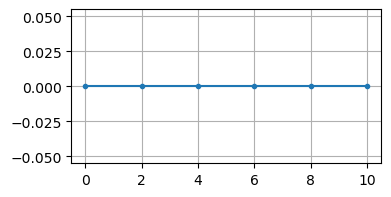

In [28]:
L = 10 #cm (comprimento) 
dx = 2.    # cm
# Coordenada dos pontos
xi = np.arange(0, L+dx, dx)
T = [np.zeros(len(xi))]

plt.plot(xi, T[0],'.-')
plt.grid()
plt.show()

In [29]:
dt = 0.1     # seg
kl = 0.49    # cal/(s cm ºC)
C = 0.2174   # cal/(g ºC)
p = 2.7      # g/cm³

k = kl/(p*C)
lamb = k*(dt/dx**2) 
print("Lambda=", lamb)

Lambda= 0.020869535588946813


[100.   0.   0.   0.   0.  50.]
[0. 0. 0. 0.]
[2.08695356 0.         0.         1.04347678]
[4.08679961 0.04355375 0.02177688 2.04339981]
[6.0040829  0.12747994 0.06442168 3.00204145]


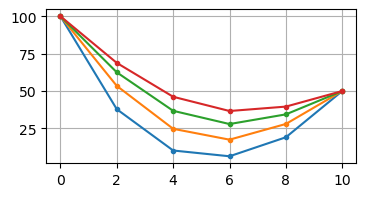

In [30]:
# Temperaturas em cada instante
# (lista para armazenar os dados)# Estado inicial
T0 = np.full(len(xi), 0.0)

# Condições de contorno
T0[0] = 100.
T0[-1] = 50.
print(T0)
T = [T0]

# Calculando
for t in range(121):
    Tb = T[-1].copy() 
    Tf = T[-1].copy()
    Tf[1:-1] = Tb[1:-1]+lamb*(Tb[2:]-2*Tb[1:-1]+Tb[0:-2])
    T.append(Tf)

print(T[0][1:-1])
print(T[1][1:-1])   
print(T[2][1:-1])   
print(T[3][1:-1])
plt.figure(figsize=(4,2))
#plt.plot(xi, T[0],'.-')
plt.plot(xi, T[30],'.-')
plt.plot(xi, T[60],'.-')
plt.plot(xi, T[90],'.-')
plt.plot(xi, T[120],'.-')

plt.grid()

### Uma solução implícita simples da equação de condução de calor
Nos métodos implícitos, a derivada espacial é aproximada em um nível de tempo avançado, $l + 1$. Por exemplo, a segunda derivada seria aproximada por 

$$\frac{\partial^2 T}{\partial x^2} \cong \frac{T_{i+1}^{l+1}-2 T_i^{l+1}+T_{i-1}^{l+1}}{(\Delta x)^2}$$

Substituindo na equação do calor, obtem-se

$$
k \frac{T_{i+1}^{l+1}-2 T_i^{l+1}+T_{i-1}^{l+1}}{(\Delta x)^2}=\frac{T_i^{l+1}-T_i^l}{\Delta t}
$$

que pode ser expressa como

$$
-\lambda T_{i-1}^{l+1}+(1+2 \lambda) T_i^{l+1}-\lambda T_{i+1}^{l+1}=T_i^l
$$

Essa equação se aplica a todos, exceto o primeiro e o último nós interiores, nos quais precisa ser modificada para refletir as condições de contorno. Assim, em resumo, tem-se:


**Para o primeiro nó interior:**

$$
(1+2 \lambda) T_1^{l+1}-\lambda T_2^{l+1}=T_1^l+\lambda T_0^{l+1}
$$

**Todos exceto o primeiro e o último:**

$$
-\lambda T_{i-1}^{l+1}+(1+2 \lambda) T_i^{l+1}-\lambda T_{i+1}^{l+1}=T_i^l
$$

**Para o último nó interior:**

$$
-\lambda T_{m-1}^{l+1}+(1+2 \lambda) T_m^{l+1}=T_m^l+\lambda T_{m+1}^{l+1}
$$

**Exemplo 2:** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/787)) Use a aproximação implícita simples por diferenças finitas para resolver o mesmo problema que no Exemplo 1.

Aplicando das equações de diferenças obtemos o seguinte sistema:
$$
\left[\begin{array}{cccc}
1,04175 & -0,020875 & & \\
-0,020875 & 1,04175 & -0,020875 & \\
& -0,020875 & 1,04175 & -0,020875 \\
& & -0,020875 & 1,04175
\end{array}\right]\left\{\begin{array}{l}
T_1^1 \\
T_2^1 \\
T_3^1 \\
T_4^1
\end{array}\right\}=\left\{\begin{array}{c}
2,0875 \\
0 \\
0 \\
1,04375
\end{array}\right\}
$$

que deve ser resolvido para determinar as temperatiuras em $t=0,1$s.

Para determinar as temperaturas em $t = 0,2$, o vetor à direita deve ser modificado para levar em conta os resultados do primeiro passo.

In [36]:
L = 10 #cm (comprimento) 
dx = 2.    # cm
# Coordenada dos pontos
xi = np.arange(0, L+dx, dx)

In [37]:
M = np.zeros((6,6))
for i in range(1,len(M)-1):
    M[i,i-1]=-lamb
    M[i,i]=1+2*lamb
    M[i,i+1]=-lamb
A = M[1:-1,1:-1]
print(np.round(A,4))

[[ 1.0417 -0.0209  0.      0.    ]
 [-0.0209  1.0417 -0.0209  0.    ]
 [ 0.     -0.0209  1.0417 -0.0209]
 [ 0.      0.     -0.0209  1.0417]]


In [38]:
# Temperaturas em cada instante
T0 = np.full(len(xi), 0.0)

# Condições de contorno
T0[0] = 100.
T0[-1] = 50.
T = [T0]

B0 = np.zeros(4)
B0[0] = T0[0]*lamb
B0[-1] = T0[-1]*lamb

print(B0)

[2.08695356 0.         0.         1.04347678]


In [39]:
np.linalg.solve(A,B0)

array([2.00414889, 0.04056829, 0.02088788, 1.00208654])

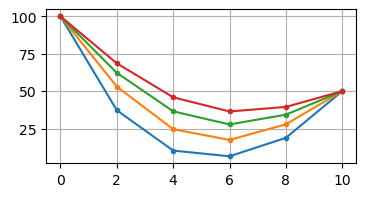

In [40]:
for i in range(121):
    B = B0 + T[-1][1:-1]
    s = np.linalg.solve(A,B)
    Tf = T[-1].copy()
    Tf[1:-1] = s
    T.append(Tf)
    #print(s)

plt.plot(xi, T[30],'.-')
plt.plot(xi, T[60],'.-')
plt.plot(xi, T[90],'.-')
plt.plot(xi, T[120],'.-')

plt.grid()

### Equação do calor 2D transiente

$$\frac{\partial u}{\partial t}-\alpha \nabla u = 0 $$

em 2d fica

$$\frac{\partial u}{\partial t}-\alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)= 0 $$

Na função $u(x,y,t) = u^k_{i,j}$ os índices $i$ , $j$ , e $k$ indicam os passos em $x$ , $y$ e em $t$ respectivamente.  


Podemos escrever a equação de calor acima usando o método de diferenças finitas como este



$$ \frac{u^{k+1}_{i,j} -u^{k}_{i,j}}{h_t} 
-\alpha \left(\frac{u^k_{i+1,j} - 2u^k_{i,j} + u^k_{i-1,j}}{h_x^2} 
+ \frac{u^k_{i,j+1} - 2u^k_{i,j} + u^k_{i,j-1}}{h_y^2} \right) = 0$$

Se organizarmos a equação acima tomando $h_x=h_y=h$, obtemos esta equação final

$$ u^{k+1}_{i,j}= \gamma \left(u^k_{i+1,j} + u^k_{i-1,j} - 4u^k_{i,j} + u^k_{i,j+1}+u^k_{i,j-1} \right) + u^k_{i,j}$$

onde 

$$\gamma = \alpha \frac{h_t}{h^2}$$

Usamos o método explícito numericamente estável para

$$h_t< \frac{h^2}{4\alpha}$$

**Exemplo 3:** Suponhamos uma placa quadrada fina com lado de 50 unidades de comprimento. A temperatura em todos os lugares dentro da placa é originalmente de 0 grau (em $t = 0$). Vamos considerar $h = 1$ e $\alpha = 2.0$. Agora podemos usar o código Python para resolver este problema numericamente para ver a temperatura em todos os lugares (indicada por $i$ e $j$ ) e ao longo do tempo (indicada por $k$). 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [42]:
xmax = 20
ymax = 40
kmax = 200

alpha = 2
h = 1
ht = (h ** 2)/(4 * alpha)
gamma = (alpha * ht) / (h ** 2)

# Array 3D: tempo × x × y
u = np.zeros((kmax, xmax, ymax))

Definimos as condições iniciais e de contorno, vamos escrever a função de cálculo com base no método de diferenças finitas que derivamos acima.

In [43]:
# Evolução temporal
for k in range(0, kmax-1):
    for i in range(1, xmax-1):
        for j in range(1, ymax-1):
            u[k+1, i, j] = (
                gamma * (u[k, i+1, j] + u[k, i-1, j] + u[k, i, j+1] + u[k, i, j-1] - 4*u[k, i, j])
                + u[k, i, j]
            )
    # reaplica condições de contorno
    u[k+1, -1, :] = 100.0
    u[k+1, 0, :] = 0
    u[k+1, :, 0] = 0
    u[k+1, :, -1] = 0

Vamos preparar a função plot para que possamos visualizar a solução (para cada k ) como um mapa de calor. Usamos a biblioteca Matplotlib , é fácil de usar.

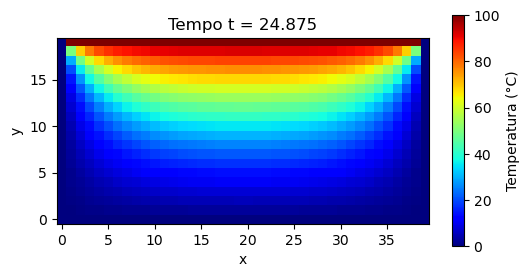

In [44]:
fig, ax = plt.subplots(figsize=(6, 3))
im = ax.imshow(u[0], cmap="jet", vmin=0, vmax=100, origin='lower')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Temperatura (°C)")
ax.set_title("Distribuição de temperatura")
ax.set_xlabel("x")
ax.set_ylabel("y")

def animate(k):
    im.set_array(u[k])
    ax.set_title(f"Tempo t = {k*ht:.3f}")
    return [im]

anim = animation.FuncAnimation(
    fig, animate, frames=kmax, interval=50, blit=True, repeat=False
)

#plt.show()
# --- Salvar como GIF ---
writer = animation.PillowWriter(fps=15)
anim.save("parabolica.gif", writer=writer)

Mais uma coisa que precisamos é animar o resultado porque queremos ver os pontos de temperatura dentro da placa mudarem ao longo do tempo. Então vamos criar a função para animar a solução.

In [45]:
from IPython.display import HTML
HTML(anim.to_jshtml())

Usamos o método explícito numericamente estável para

$$h_t< \frac{h^2}{4\alpha}$$

**Exercícios**

**1.** (Fonte: [Burden, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/833)) Determine aproximações para a equação do calor

$$
\frac{\partial u}{\partial t}(x, t)-\frac{\partial^2 u}{\partial x^2}(x, t)=0, \quad 0<x<1, \quad 0 \leq t,
$$

com condições de contorno

$$
u(0, t)=u(1, t)=0, \quad 0<t,
$$

e condições iniciais

$$
u(x, 0)=\operatorname{sen}(\pi x), \quad 0 \leq x \leq 1 .
$$

Compare os resultados em $t=0,5$ com a solução exata

$$
u(x, t)=e^{-\pi^2 t} \operatorname{sen}(\pi x)
$$

**2.** (Fonte: [Burden, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/842)) 

https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/842
Determine uma aproximação para a solução da equação diferencial parcial seguinte 

$$
\begin{aligned}
& \frac{\partial u}{\partial t}-\frac{\partial^2 u}{\partial x^2}=0, \quad 0<x<2,0<t \\
& u(0, t)=u(2, t)=0, \quad 0<t, \quad u(x, 0)=\operatorname{sen} \frac{\pi}{2} x, \quad 0 \leq x \leq 2
\end{aligned}
$$


Use $m=4, T=0,1$ e $N=2$ e compare seus resultados com a solução real $u(x, t)=e^{-\left(\pi^2 / 4\right) t}$ sen $\frac{\pi}{2} x$.


**3.** Determine uma aproximação para a solução da equação diferencial parcial seguinte

$$
\begin{aligned}
& \frac{\partial u}{\partial t}-\frac{1}{16} \frac{\partial^2 u}{\partial x^2}=0, \quad 0<x<1,0<t \\
& u(0, t)=u(1, t)=0, \quad 0<t, \quad u(x, 0)=2 \operatorname{sen} 2 \pi x, \quad 0 \leq x \leq 1
\end{aligned}
$$


Use $m=3, T=0,1$ e $N=2$ e compare seus resultados com a solução real $u(x, t)=2 e^{-\left(\pi^2 / 4\right) t} \operatorname{sen} 2 \pi x$.

### Referências

BEU, Titus A. Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press, 2014. ([PDF](https://www.if.ufrj.br/~sandra/MetComp/livros/TitusA.Beu-Introductiontonumericalprogramming_apracticalguideforscientistsandengineersusingPythonandC.pdf))

BURDEN, Richard, L. et al. Análise Numérica - Tradução da 10ª edição norte-americana. Disponível em: Minha Biblioteca, (3rd edição). Cengage Learning Brasil, 2016. ([Link](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/820))

BUTLER,J. S. Numerical Methods for Differential Equations with
Python. Disponível em:
https://johnsbutler.netlify.app/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf. Acessado em: 12/08/2023

CHAPRA, Steven C.; CANALE, Raymond P. Métodos numéricos para engenharia. São Paulo: Grupo A, 2016. E-book. ISBN 9788580555691. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788580555691/. Acesso em: 11 set. 2023.

NERVADOF, G. Solving 2D Heat Equation Numerically using Python. Level Up Coding, 2020. Disponível em: https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a. Acessado em: 12/08/2023
